In [10]:
# Load packages
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

In [15]:
file_path = '/Users/saikiranpennam/Documents/RA/Western_Sugar_AI_Assessment_Working/2023/Book1.csv'

# Data Preprocessing

In [16]:
# create import function
def import_data(path):
    dfList = []
    df = pd.DataFrame()
    for sugar_chunks in pd.read_csv(file_path, chunksize=150000):
        dfList.append(sugar_chunks)
    df = pd.concat(dfList, sort=False)
    return df

In [17]:
pd.set_option('display.max_columns', None)
sugarbeets = import_data(file_path)
sugarbeets.head()

,DateTime,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity,FILTER#4_CTRL_FRC,Second_Filters_Supply_Tank_Temperature,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
0,9/1/22 0:00,5.982146,0.751015,5.982146,0.751015,518.1974,0.0,0.0,0.755994,0.158802,-0.058369,0.306309,21.98577,0.608895,0.0,0.608895,-0.213501,116.3939,0.0,-37.49435,0.614604,0.029644,112.7016,0.0,0.098603,0.378815,0.098603,0.119497,0.0,0.468072,-0.086892,0.247091,0.0,0.0,0.0,0.0,0.0,0.0
1,9/1/22 0:00,5.982146,0.751378,5.982146,0.751378,518.1974,0.0,0.0,0.749697,0.160922,-0.059380,0.302972,21.80182,0.599265,0.0,0.599265,-0.212489,116.3773,0.0,-37.49318,0.608082,0.030007,112.6696,0.0,0.099613,0.374156,0.099613,0.116125,0.0,0.468072,-0.085880,0.243723,0.0,0.0,0.0,0.0,0.0,0.0
2,9/1/22 0:01,5.982146,0.751719,5.982146,0.751719,518.1974,0.0,0.0,0.743771,0.162917,-0.059343,0.299831,21.79332,0.590201,0.0,0.590201,-0.212568,116.3617,0.0,-37.49208,0.601943,0.030348,112.6212,0.0,0.099641,0.369771,0.099641,0.117259,0.0,0.468072,-0.081598,0.247289,0.0,0.0,0.0,0.0,0.0,0.0
3,9/1/22 0:02,5.982146,0.752317,5.982146,0.752317,518.1974,0.0,0.0,0.733400,0.162520,-0.059280,0.299485,21.77844,0.574340,0.0,0.574340,-0.212707,116.3344,0.0,-37.49016,0.591200,0.030946,112.5364,0.0,0.099690,0.362098,0.099690,0.119244,0.0,0.468072,-0.074105,0.253528,0.0,0.0,0.0,0.0,0.0,0.0
4,9/1/22 0:03,5.982146,0.752990,5.982146,0.752990,518.1974,0.0,0.0,0.745490,0.162072,-0.059209,0.299096,21.76170,0.583214,0.0,0.583214,-0.212863,116.3036,0.0,-37.48800,0.579115,0.031618,112.4410,0.0,0.099744,0.363160,0.099744,0.121478,0.0,0.468072,-0.074249,0.253323,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
pd.DataFrame(sugarbeets.isnull().sum()).reset_index(drop=False).sort_values(by=0,ascending=False)[:]

,index,0
9,Filter#2_Wash_Spray_Flow,12221
11,Filter#2_Outlet_Pressure,11713
14,FILTER#3_CTRL_PRC,240
5,Filter#1_Turbidity,227
34,Filter#3_Flow_Control_Valve,225
32,Filter#1_Flow_Control_Valve,221
35,Filter#4 _Flow_Control_Valve,219
17,Filter#3_Turbidity,217
33,Filter#2_Flow_Control_Valve,211
18,FILTER#4_CTRL_FRC,204


In [19]:
sugarbeets.describe([0.05, 0.25, 0.5, 0.75, 0.95])

,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity,FILTER#4_CTRL_FRC,Second_Filters_Supply_Tank_Temperature,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
count,102478.000000,102529.000000,102562.000000,102513.000000,102447.000000,102486.000000,102473.000000,102600.000000,90453.000000,102585.000000,90961.000000,102527.000000,102558.000000,102434.000000,102568.000000,102582.000000,102457.000000,102470.000000,102545.000000,102555.000000,102502.000000,102551.000000,102530.000000,102607.000000,102589.000000,102580.000000,102486.000000,102488.000000,102571.000000,102544.000000,102522.000000,102453.000000,102463.000000,102449.000000,102455.000000,102521.000000,102485.000000
mean,191.364823,8.726348,190.132653,8.655581,380.119715,207.190697,9.468805,194.199167,45.541455,9.586107,6.325967,187.520505,197.153944,8.077123,193.371492,8.043195,257.787892,202.248596,59.152592,199.153307,8.052738,167.427462,185.952235,8.702987,178.659827,8.678053,232.688070,182.667532,177.669593,8.485418,187.323677,17.694412,16.931924,19.860441,17.943472,18.775531,17.416325
std,221.180579,10.847620,219.976747,10.709330,214.062860,220.673751,11.796423,229.148883,60.711648,12.008520,4.836492,191.580887,223.974225,11.032279,225.151866,11.237460,210.160968,225.985894,38.772035,230.657394,11.133382,152.936968,221.659272,11.847113,222.702524,11.992437,207.562459,223.771523,226.062864,11.728533,154.611070,25.421794,26.650228,26.054243,25.565843,27.662869,27.103263
min,0.000000,0.000000,5.292939,-0.933860,-124.964600,0.000000,0.000000,0.203172,-0.308186,-0.927973,-0.930914,-125.000000,0.000000,0.000000,-45.551600,-0.925027,-124.126500,0.000000,-37.500000,0.415125,-0.927973,-123.881100,0.000000,0.000000,0.150070,-0.927973,0.067055,0.000000,0.203097,-0.930914,0.175014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,5.548436,-0.895917,2.433318,0.000000,0.000000,0.447019,-0.131535,-0.895581,0.070806,8.008027,0.000000,0.000000,0.476297,-0.847104,12.136946,0.000000,-0.924617,0.549786,-0.388720,25.155155,0.000000,0.000000,0.309071,-0.884145,7.595560,0.000000,0.358764,-0.888666,39.592540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.471912,0.991053,5.873337,0.987882,181.164150,0.000000,0.000000,0.718104,0.102452,-0.041713,0.309836,39.150875,0.555642,0.000000,0.586878,-0.189527,53.470090,0.000000,17.906020,0.675708,0.060959,59.277130,0.000000,0.109906,0.468072,0.107601,33.905768,0.000000,0.521100,-0.149812,70.162710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.517825,2.227742,74.249730,2.226386,518.197400,200.000000,3.190291,93.161505,5.516961,3.620937,7.628372,93.437370,108.834600,0.818239,91.025990,0.484502,176.067600,137.888700,83.283300,107.445000,0.250330,107.844900,48.652000,0.249585,40.483870,0.174858,151.868750,23.220325,27.577590,0.576070,116.824600,6.226750,6.880188,10.822080,10.681360,4.050126,2.263309
75%,350.000000,13.517930,347.556275,13.777540,518.197600,350.000000,16.334880,346.992075,84.930090,16.856480,10.049730,344.383950,350.000000,13.280952,349.322225,13.575312,518.197800,356.855600,87.713030,351.313650,13.453003,223.177200,350.000000,15.006135,332.386200,15.223395,515.490275,350.000000,331.277850,14.482803,287.919000,24.322930,19.613360,28.539240,23.360010,24.670370,21.663760
95%,656.584895,34.551452,664.504920,34.155998,518.197600,673.367625

In [20]:
n_rows = sugarbeets.shape[0]
n_rows

102674

# Outlier Function

In [21]:
sgrb_copy = sugarbeets.copy()
sgrb_copy.head()

,DateTime,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity,FILTER#4_CTRL_FRC,Second_Filters_Supply_Tank_Temperature,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
0,9/1/22 0:00,5.982146,0.751015,5.982146,0.751015,518.1974,0.0,0.0,0.755994,0.158802,-0.058369,0.306309,21.98577,0.608895,0.0,0.608895,-0.213501,116.3939,0.0,-37.49435,0.614604,0.029644,112.7016,0.0,0.098603,0.378815,0.098603,0.119497,0.0,0.468072,-0.086892,0.247091,0.0,0.0,0.0,0.0,0.0,0.0
1,9/1/22 0:00,5.982146,0.751378,5.982146,0.751378,518.1974,0.0,0.0,0.749697,0.160922,-0.059380,0.302972,21.80182,0.599265,0.0,0.599265,-0.212489,116.3773,0.0,-37.49318,0.608082,0.030007,112.6696,0.0,0.099613,0.374156,0.099613,0.116125,0.0,0.468072,-0.085880,0.243723,0.0,0.0,0.0,0.0,0.0,0.0
2,9/1/22 0:01,5.982146,0.751719,5.982146,0.751719,518.1974,0.0,0.0,0.743771,0.162917,-0.059343,0.299831,21.79332,0.590201,0.0,0.590201,-0.212568,116.3617,0.0,-37.49208,0.601943,0.030348,112.6212,0.0,0.099641,0.369771,0.099641,0.117259,0.0,0.468072,-0.081598,0.247289,0.0,0.0,0.0,0.0,0.0,0.0
3,9/1/22 0:02,5.982146,0.752317,5.982146,0.752317,518.1974,0.0,0.0,0.733400,0.162520,-0.059280,0.299485,21.77844,0.574340,0.0,0.574340,-0.212707,116.3344,0.0,-37.49016,0.591200,0.030946,112.5364,0.0,0.099690,0.362098,0.099690,0.119244,0.0,0.468072,-0.074105,0.253528,0.0,0.0,0.0,0.0,0.0,0.0
4,9/1/22 0:03,5.982146,0.752990,5.982146,0.752990,518.1974,0.0,0.0,0.745490,0.162072,-0.059209,0.299096,21.76170,0.583214,0.0,0.583214,-0.212863,116.3036,0.0,-37.48800,0.579115,0.031618,112.4410,0.0,0.099744,0.363160,0.099744,0.121478,0.0,0.468072,-0.074249,0.253323,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def find_outliers(sgrb_copy):
    q1 = sgrb_copy.quantile(0.25)
    q3 = sgrb_copy.quantile(0.75)
    
    IQR  = q3 - q1
    
    outliers = sgrb_copy[ ( (sgrb_copy < (q1 - 1.5 * IQR)) | (sgrb_copy > (q3 + 1.5 * IQR)) ) ]
    
    return outliers

outliers = find_outliers(sgrb_copy['Filter#1_Inlet_Flow'])
outliers

4785     883.8063
4786     879.3223
21751    883.3439
21752    891.0698
21753    882.3078
           ...   
78819    982.4573
78820    942.1936
78821    923.9727
78822    907.9739
78823    892.1528
Name: Filter#1_Inlet_Flow, Length: 97, dtype: float64

In [23]:
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 97
max outlier value: 1338.597
min outlier value: 860.2661


# Filtering the Data

In [24]:
# Condition 1: High turbidity and low flow
condition1 = ((sgrb_copy['Filter#1_Turbidity'] - sgrb_copy['Filter#1_Turbidity'].mean()) / sgrb_copy['Filter#1_Turbidity'].std() <= 3) & \
             ((sgrb_copy['Filter#1_Inlet_Flow'] - sgrb_copy['Filter#1_Inlet_Flow'].mean()) / sgrb_copy['Filter#1_Inlet_Flow'].std() <= 3)

# Condition 2: Zero turbidity and zero flow
condition2 = (sgrb_copy['Filter#1_Turbidity'] <= sgrb_copy['Filter#1_Turbidity'].quantile(0.05)) & \
             (sgrb_copy['Filter#1_Inlet_Flow'] <= sgrb_copy['Filter#1_Inlet_Flow'].quantile(0.05))

# Condition 3: High flow and zero pressure
condition3 = ((sgrb_copy['Filter#1_Inlet_Flow'] - sgrb_copy['Filter#1_Inlet_Flow'].max()) / sgrb_copy['Filter#1_Inlet_Flow'].std() <= 1) & \
             (sgrb_copy['Filter#1_Inlet_Pressure'] <= sgrb_copy['Filter#1_Inlet_Pressure'].quantile(0.05))

# Condition 4: High flow and zero turbidity
condition4 = ((sgrb_copy['Filter#1_Inlet_Flow'] - sgrb_copy['Filter#1_Inlet_Flow'].max()) / sgrb_copy['Filter#1_Inlet_Flow'].std() <= 1) & \
             (sgrb_copy['Filter#1_Turbidity'] <= sgrb_copy['Filter#1_Turbidity'].quantile(0.05))

# Apply the conditions to filter the DataFrame
filtered_df = sgrb_copy[condition1 | condition2 | condition3 | condition4]
filtered_df

,DateTime,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity,FILTER#4_CTRL_FRC,Second_Filters_Supply_Tank_Temperature,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
0,9/1/22 0:00,5.982146,0.751015,5.982146,0.751015,518.197400,0.0,0.0,0.755994,0.158802,-0.058369,0.306309,21.98577,0.608895,0.0,0.608895,-0.213501,116.39390,0.0,-37.49435,0.614604,0.029644,112.7016,0.0,0.098603,0.378815,0.098603,0.119497,0.0,0.468072,-0.086892,0.247091,0.0,0.0,0.0,0.0,0.0,0.0
1,9/1/22 0:00,5.982146,0.751378,5.982146,0.751378,518.197400,0.0,0.0,0.749697,0.160922,-0.059380,0.302972,21.80182,0.599265,0.0,0.599265,-0.212489,116.37730,0.0,-37.49318,0.608082,0.030007,112.6696,0.0,0.099613,0.374156,0.099613,0.116125,0.0,0.468072,-0.085880,0.243723,0.0,0.0,0.0,0.0,0.0,0.0
2,9/1/22 0:01,5.982146,0.751719,5.982146,0.751719,518.197400,0.0,0.0,0.743771,0.162917,-0.059343,0.299831,21.79332,0.590201,0.0,0.590201,-0.212568,116.36170,0.0,-37.49208,0.601943,0.030348,112.6212,0.0,0.099641,0.369771,0.099641,0.117259,0.0,0.468072,-0.081598,0.247289,0.0,0.0,0.0,0.0,0.0,0.0
3,9/1/22 0:02,5.982146,0.752317,5.982146,0.752317,518.197400,0.0,0.0,0.733400,0.162520,-0.059280,0.299485,21.77844,0.574340,0.0,0.574340,-0.212707,116.33440,0.0,-37.49016,0.591200,0.030946,112.5364,0.0,0.099690,0.362098,0.099690,0.119244,0.0,0.468072,-0.074105,0.253528,0.0,0.0,0.0,0.0,0.0,0.0
4,9/1/22 0:03,5.982146,0.752990,5.982146,0.752990,518.197400,0.0,0.0,0.745490,0.162072,-0.059209,0.299096,21.76170,0.583214,0.0,0.583214,-0.212863,116.30360,0.0,-37.48800,0.579115,0.031618,112.4410,0.0,0.099744,0.363160,0.099744,0.121478,0.0,0.468072,-0.074249,0.253323,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102666,5/16/23 7:11,5.876133,1.256753,5.876133,1.256753,2.023194,250.0,0.0,0.720559,0.058586,-0.037758,0.313580,50.71520,0.636731,0.0,0.636731,-0.179744,63.24566,0.0,10.57033,0.687087,0.076517,121.2080,0.0,0.126754,0.462569,0.126754,515.874000,0.0,0.528767,-0.112380,77.644320,0.0,0.0,0.0,0.0,0.0,0.0
102667,5/16/23 7:17,5.876133,1.256753,5.876133,1.256753,1.997520,250.0,0.0,0.724370,0.061268,-0.038006,0.322303,50.68836,0.634417,0.0,0.634417,-0.179850,62.37746,0.0,10.60487,0.685372,0.076341,121.1599,0.0,0.126538,0.464410,0.126538,515.872900,0.0,0.526884,-0.112380,77.576450,0.0,0.0,0.0,0.0,0.0,0.0
102668,5/16/23 7:23,5.876133,1.256753,5.876133,1.256753,1.997939,250.0,0.0,0.728213,0.063973,-0.038258,0.331098,50.66129,0.632083,0.0,0.632083,-0.179957,61.50204,0.0,10.63968,0.683642,0.076163,121.1113,0.0,0.126322,0.466267,0.126322,515.871800,0.0,0.524985,-0.112380,77.508030,0.0,0.0,0.0,0.0,0.0,0.0
102669,5/16/23 7:26,5.876133,1.256753,5.876133,1.256753,1.998185,250.0,0.0,0.730467,0.065560,-0.038405,0.336259,50.64541,0.630713,0.0,0.630713,-0.180020,60.98836,0.0,10.66012,0.682627,0.076059,121.0829,0.0,0.126194,0.467356,0.126194,515.871800,0.0,0.523872,-0.112380,77.467890,0.0,0.0,0.0,0.0,0.0,0.0


# Define Hypothesis - 
## How will you use the output of predictive maintenance?
## Define Breakdown
## What signals have patterns of degrade or breakdown
## How often signals are connected?
## How much normal and failure data do you have?

# Forming the Hypothesis
# Predict if equipment will fail in next 'N' period
# Predict if equipment will fail in next N1, N2 period
# Predict if equipment will fail in next 'N' period due to fault in part 'X'
# Predict time to failure or remaining life of equipment
# Find anomalies

# Box Plot

In [25]:
sgrb_copy_2 = sugarbeets.copy()
sgrb_copy_2 = sugarbeets.set_index(pd.DatetimeIndex(pd.to_datetime(sugarbeets['DateTime'])))
del sgrb_copy_2['DateTime']
sgrb_copy_2.head()

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_45502/3164234748.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sgrb_copy_2 = sugarbeets.set_index(pd.DatetimeIndex(pd.to_datetime(sugarbeets['DateTime'])))


,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity,FILTER#4_CTRL_FRC,Second_Filters_Supply_Tank_Temperature,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-09-01 00:00:00,5.982146,0.751015,5.982146,0.751015,518.1974,0.0,0.0,0.755994,0.158802,-0.058369,0.306309,21.98577,0.608895,0.0,0.608895,-0.213501,116.3939,0.0,-37.49435,0.614604,0.029644,112.7016,0.0,0.098603,0.378815,0.098603,0.119497,0.0,0.468072,-0.086892,0.247091,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:00:00,5.982146,0.751378,5.982146,0.751378,518.1974,0.0,0.0,0.749697,0.160922,-0.059380,0.302972,21.80182,0.599265,0.0,0.599265,-0.212489,116.3773,0.0,-37.49318,0.608082,0.030007,112.6696,0.0,0.099613,0.374156,0.099613,0.116125,0.0,0.468072,-0.085880,0.243723,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:01:00,5.982146,0.751719,5.982146,0.751719,518.1974,0.0,0.0,0.743771,0.162917,-0.059343,0.299831,21.79332,0.590201,0.0,0.590201,-0.212568,116.3617,0.0,-37.49208,0.601943,0.030348,112.6212,0.0,0.099641,0.369771,0.099641,0.117259,0.0,0.468072,-0.081598,0.247289,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:02:00,5.982146,0.752317,5.982146,0.752317,518.1974,0.0,0.0,0.733400,0.162520,-0.059280,0.299485,21.77844,0.574340,0.0,0.574340,-0.212707,116.3344,0.0,-37.49016,0.591200,0.030946,112.5364,0.0,0.099690,0.362098,0.099690,0.119244,0.0,0.468072,-0.074105,0.253528,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:03:00,5.982146,0.752990,5.982146,0.752990,518.1974,0.0,0.0,0.745490,0.162072,-0.059209,0.299096,21.76170,0.583214,0.0,0.583214,-0.212863,116.3036,0.0,-37.48800,0.579115,0.031618,112.4410,0.0,0.099744,0.363160,0.099744,0.121478,0.0,0.468072,-0.074249,0.253323,0.0,0.0,0.0,0.0,0.0,0.0


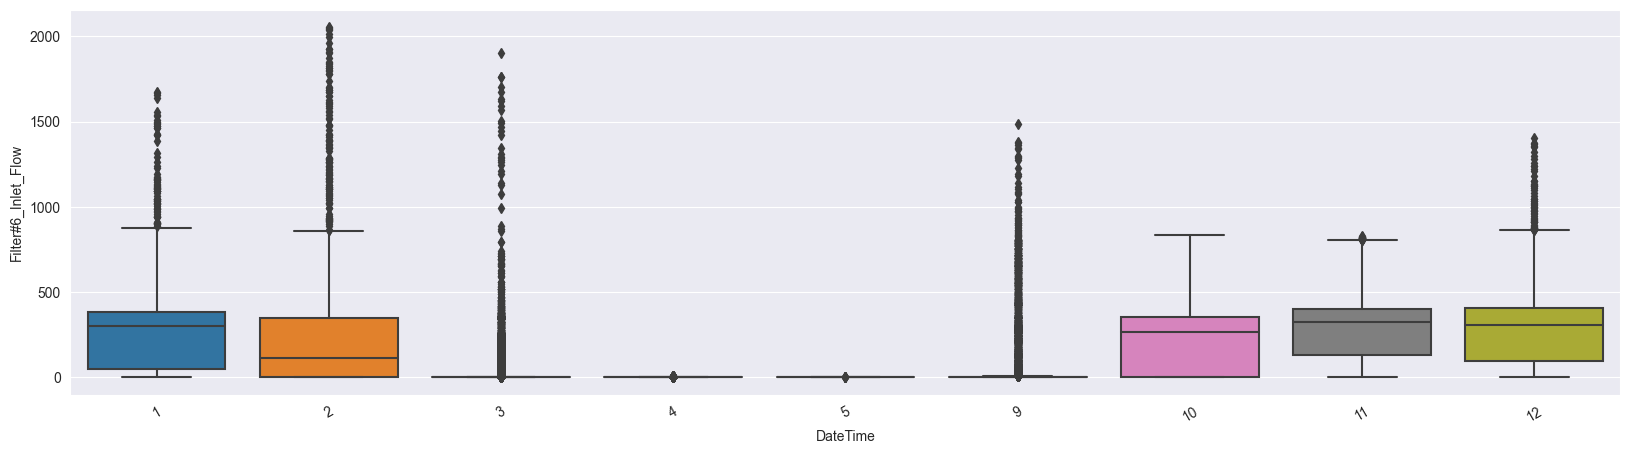

In [48]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x = sgrb_copy_2.index.month,
            y = sgrb_copy_2['Filter#1_Inlet_Flow'],
            ax = ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.savefig("Box-Plot_Filter#1.png")

In [27]:
# TODO - Redundancy in the code, have only one function for all the filters...
'''
# TODO - 3 Conditions -- High Turbidity Low Flow (Dirty)
                        Zero Turbidity Zero Flow (Offline)

                        Pre-Coat
                        High Flow Zero Turbidity
                        High Flow Zero Pressure
'''
# Switched to 1 hour for a better representation in terms of trend, seasonality and mainly for pattern analysis...

'\n# TODO - 3 Conditions -- High Turbidity Low Flow (Dirty)\n                        Zero Turbidity Zero Flow (Offline)\n\n                        Pre-Coat\n                        High Flow Zero Turbidity\n                        High Flow Zero Pressure\n'

In [28]:
import sklearn

In [54]:
from sklearn.utils import shuffle
# Shuffle data and take 20% sample
sugarbeets = shuffle(sugarbeets)
sample = sugarbeets.sample(frac = 0.2)

# Group by product
by_product = sample.groupby('DateTime')

# Getting 10th and 90th percentile per group
stats = by_product['Filter#1_Inlet_Flow'].quantile([.25, .75]).unstack()

# Most frequent values per group
top_values = by_product['Filter#1_Turbidity'].value_counts().groupby(level=0).nlargest(1)

# boxplot per product
# box_plots = sample.boxplot(by='Filter#1_Inlet_Flow')
sns.boxplot(data=sample, y='Filter#1_Inlet_Flow', x='Filter#1_Turbidity')
plt.show()

Filter#1_CTRL_FRC                           196
Filter#1_CTRL_PRC                           145
Filter#1_Inlet_Flow                         112
Filter#1_Inlet_Pressure                     161
Filter#1_Turbidity                          227
Filter#2_CTRL_FRC                           188
Filter#2_CTRL_PRC                           201
Filter#2 _Inlet_Flow                         74
Filter#2_Wash_Spray_Flow                  12221
Filter#2 _Inlet_Pressure                     89
Filter#2_Outlet_Pressure                  11713
Filter#2_Turbidity                          147
FILTER#3_CTRL_FRC                           116
FILTER#3_CTRL_PRC                           240
Filter#3_Inlet Flow                         106
Filter#3_Inlet_Pressure                      92
Filter#3_Turbidity                          217
FILTER#4_CTRL_FRC                           204
Second_Filters_Supply_Tank_Temperature      129
Filter#4 _Inlet_Flow                        119
Filter#4_Inlet_Pressure                 

In [57]:
# Resample to 1-day intervals
df_1hour = sgrb_copy_2.resample('H').mean()
df_1hour

Filter#1_CTRL_FRC                          0.190895
Filter#1_CTRL_PRC                          0.141224
Filter#1_Inlet_Flow                        0.109083
Filter#1_Inlet_Pressure                    0.156807
Filter#1_Turbidity                         0.221088
Filter#2_CTRL_FRC                          0.183104
Filter#2_CTRL_PRC                          0.195765
Filter#2 _Inlet_Flow                       0.072073
Filter#2_Wash_Spray_Flow                  11.902721
Filter#2 _Inlet_Pressure                   0.086682
Filter#2_Outlet_Pressure                  11.407951
Filter#2_Turbidity                         0.143172
FILTER#3_CTRL_FRC                          0.112979
FILTER#3_CTRL_PRC                          0.233750
Filter#3_Inlet Flow                        0.103239
Filter#3_Inlet_Pressure                    0.089604
Filter#3_Turbidity                         0.211349
FILTER#4_CTRL_FRC                          0.198687
Second_Filters_Supply_Tank_Temperature     0.125640
Filter#4 _In

In [58]:
df_1hour.plot(y=['Filter#1_CTRL_FRC'], figsize=(24, 7))

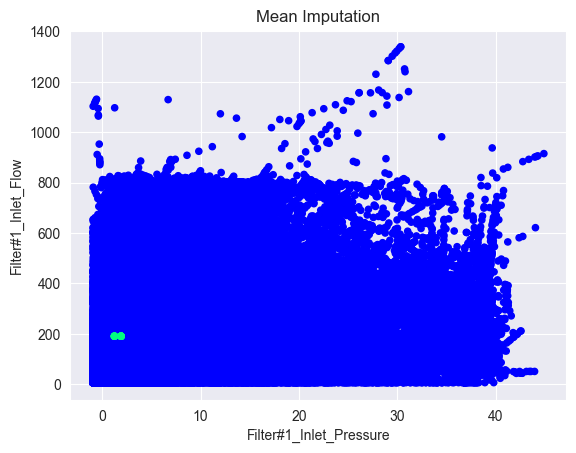

In [60]:
df_1hour["Filter#1_Turbidity"].max(), df_1hour["Filter#1_Turbidity"].min()

In [33]:
#df_1hour["Filter#1_Turbidity"].hist()
profile = ProfileReport(sugarbeets, title="Western Sugar Report", explorative=True)
profile.to_file("WS_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# SQL queries...

In [34]:
from pandasql import sqldf

In [48]:
filter_data = sqldf("SELECT * FROM sgrb_copy_2")
filter_data

,DateTime,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity,FILTER#4_CTRL_FRC,Second_Filters_Supply_Tank_Temperature,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
0,2022-09-01 00:00:00.000000,5.982146,0.751015,5.982146,0.751015,518.197400,0.0,0.0,0.755994,0.158802,-0.058369,0.306309,21.98577,0.608895,0.0,0.608895,-0.213501,116.39390,0.0,-37.49435,0.614604,0.029644,112.7016,0.0,0.098603,0.378815,0.098603,0.119497,0.0,0.468072,-0.086892,0.247091,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-01 00:00:00.000000,5.982146,0.751378,5.982146,0.751378,518.197400,0.0,0.0,0.749697,0.160922,-0.059380,0.302972,21.80182,0.599265,0.0,0.599265,-0.212489,116.37730,0.0,-37.49318,0.608082,0.030007,112.6696,0.0,0.099613,0.374156,0.099613,0.116125,0.0,0.468072,-0.085880,0.243723,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-01 00:01:00.000000,5.982146,0.751719,5.982146,0.751719,518.197400,0.0,0.0,0.743771,0.162917,-0.059343,0.299831,21.79332,0.590201,0.0,0.590201,-0.212568,116.36170,0.0,-37.49208,0.601943,0.030348,112.6212,0.0,0.099641,0.369771,0.099641,0.117259,0.0,0.468072,-0.081598,0.247289,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-01 00:02:00.000000,5.982146,0.752317,5.982146,0.752317,518.197400,0.0,0.0,0.733400,0.162520,-0.059280,0.299485,21.77844,0.574340,0.0,0.574340,-0.212707,116.33440,0.0,-37.49016,0.591200,0.030946,112.5364,0.0,0.099690,0.362098,0.099690,0.119244,0.0,0.468072,-0.074105,0.253528,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-01 00:03:00.000000,5.982146,0.752990,5.982146,0.752990,518.197400,0.0,0.0,0.745490,0.162072,-0.059209,0.299096,21.76170,0.583214,0.0,0.583214,-0.212863,116.30360,0.0,-37.48800,0.579115,0.031618,112.4410,0.0,0.099744,0.363160,0.099744,0.121478,0.0,0.468072,-0.074249,0.253323,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102669,2023-05-16 07:26:00.000000,5.876133,1.256753,5.876133,1.256753,1.998185,250.0,0.0,0.730467,0.065560,-0.038405,0.336259,50.64541,0.630713,0.0,0.630713,-0.180020,60.98836,0.0,10.66012,0.682627,0.076059,121.0829,0.0,0.126194,0.467356,0.126194,515.871800,0.0,0.523872,-0.112380,77.467890,0.0,0.0,0.0,0.0,0.0,0.0
102670,2023-05-16 07:28:00.000000,5.876133,1.256753,5.876133,1.256753,1.998298,250.0,0.0,0.731505,0.066290,-0.038473,0.338633,50.63810,0.630083,0.0,0.630083,-0.180049,60.75202,0.0,10.66952,0.682160,NaN,121.0698,0.0,0.126136,0.467857,0.126136,515.871800,0.0,0.523359,-0.112380,77.449410,0.0,0.0,0.0,0.0,0.0,0.0
102671,2023-05-16 07:28:00.000000,NaN,1.256753,NaN,1.256753,1.998342,250.0,0.0,0.731907,0.066574,-0.038499,0.339554,50.63527,0.629839,0.0,0.629839,-0.180060,60.66038,0.0,10.67316,0.681979,NaN,121.0647,0.0,0.126113,0.468052,0.126113,515.871800,0.0,0.523160,-0.112380,77.442250,0.0,0.0,0.0,0.0,0.0,0.0
102672,2023-05-16 07:29:00.000000,NaN,1.256753,NaN,1.256753,1.998346,250.0,0.0,0.731949,0.066603,-0.038502,0.339651,50.63497,0.629813,0.0,0.629813,-0.180061,60.65073,0.0,10.67355,0.681960,NaN,121.0641,0.0,NaN,0.468072,NaN,515.871800,0.0,0.523139,-0.112380,77.441500,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
query1 = """
            SELECT *
            FROM filter1_df
            WHERE Filter#1_Inlet_Flow > 100, Turbidity > 250
         """

# Filter#1

In [35]:
filter1_df = df_1hour.iloc[:,0:5]
filter1_df.head()

,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity
DateTime,,,,,
2022-09-01 00:00:00,5.948842,0.762126,5.948842,0.762126,436.645052
2022-09-01 01:00:00,5.929180,0.818891,5.929180,0.818891,4.409362
2022-09-01 02:00:00,5.929180,0.855701,5.929180,0.855701,3.501818
2022-09-01 03:00:00,5.929180,0.897416,5.929180,0.897416,6.510937
2022-09-01 04:00:00,5.951624,0.935463,5.951624,0.935463,9.166942


In [36]:
filter1_df.corr(numeric_only=True, method = 'pearson', min_periods=1)

,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity
Filter#1_CTRL_FRC,1.000000,0.494805,0.935828,0.449789,0.273513
Filter#1_CTRL_PRC,0.494805,1.000000,0.487766,0.959757,0.243763
Filter#1_Inlet_Flow,0.935828,0.487766,1.000000,0.444927,0.282916
Filter#1_Inlet_Pressure,0.449789,0.959757,0.444927,1.000000,0.248156
Filter#1_Turbidity,0.273513,0.243763,0.282916,0.248156,1.000000


<Axes: >

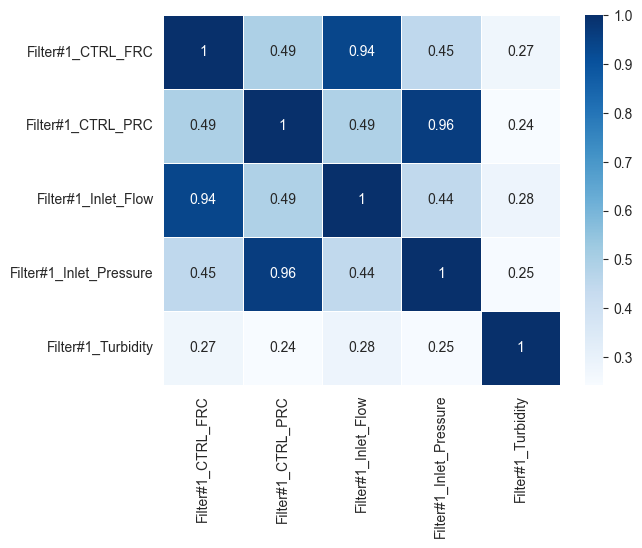

In [37]:
cormat1 = filter1_df.corr()
round(cormat1, 2)
sns.heatmap(cormat1,annot=True, cmap="Blues", linewidths=.7)

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_45502/3375037115.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(df_1hour.columns))


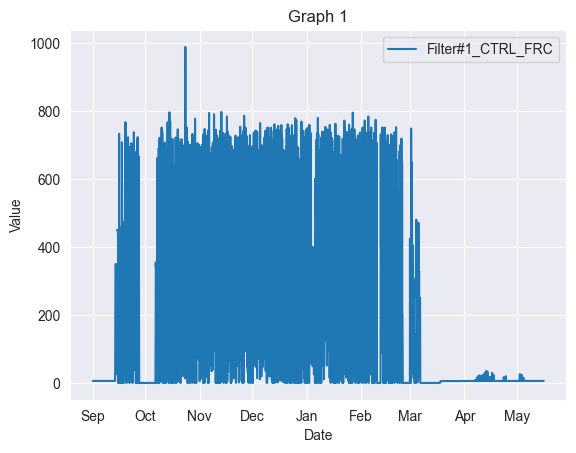

NameError: name 'image_dir' is not defined

In [38]:
from matplotlib.dates import MonthLocator, DateFormatter

# Generate a mask to identify NaN values in each column
nan_mask = df_1hour.isna()

# Define a color palette with 5 distinct colors
color_palette = plt.cm.get_cmap('tab10', len(df_1hour.columns))

# Create a PDF file to save the plots
pdf_filename = 'Filter#1.pdf'
pdf = PdfPages(pdf_filename)

# Iterate
for i, columns_subset in enumerate([df_1hour.columns[0:1], df_1hour.columns[1:2], df_1hour.columns[2:3], df_1hour.columns[3:4], df_1hour.columns[4:5]]):
    # Create a new figure and axis objects
    fig, ax = plt.subplots()

    # Line pLot for each column, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()
    
    # Save the current figure as an image (PNG) with a unique filename
    image_filename = os.path.join(image_dir, f'plot_{i+1}.png')
    fig.savefig(image_filename)
    
    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#2

In [28]:
filter2_df = df_1hour.iloc[:,5:12]
filter2_df

,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity
DateTime,,,,,,,
2022-09-01 00:00:00,0.0,0.0,0.761236,0.156168,-0.058269,0.297358,21.561319
2022-09-01 01:00:00,0.0,0.0,0.696011,0.130756,-0.052786,0.308414,20.744050
2022-09-01 02:00:00,0.0,0.0,0.706187,0.139350,-0.049201,0.303857,29.527277
2022-09-01 03:00:00,0.0,0.0,0.747934,NaN,-0.045137,0.292736,41.038934
2022-09-01 04:00:00,0.0,0.0,0.772104,NaN,-0.045627,0.278516,41.019181
...,...,...,...,...,...,...,...
2023-05-16 03:00:00,250.0,0.0,0.786366,0.090971,-0.042619,0.228968,50.306297
2023-05-16 04:00:00,250.0,0.0,0.773923,0.092106,-0.045602,0.346062,50.363895
2023-05-16 05:00:00,250.0,0.0,0.727937,NaN,-0.041944,0.202537,50.478489


In [29]:
filter2_df.corr(numeric_only=True, method = 'pearson', min_periods=1)

,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity
Filter#2_CTRL_FRC,1.000000,0.504540,0.868930,0.381757,0.431934,0.537797,-0.215542
Filter#2_CTRL_PRC,0.504540,1.000000,0.530869,0.368715,0.961709,0.518362,-0.107352
Filter#2 _Inlet_Flow,0.868930,0.530869,1.000000,0.414376,0.471914,0.592530,-0.203245
Filter#2_Wash_Spray_Flow,0.381757,0.368715,0.414376,1.000000,0.378038,0.499881,-0.078842
Filter#2 _Inlet_Pressure,0.431934,0.961709,0.471914,0.378038,1.000000,0.527319,-0.103199
Filter#2_Outlet_Pressure,0.537797,0.518362,0.592530,0.499881,0.527319,1.000000,-0.205867
Filter#2_Turbidity,-0.215542,-0.107352,-0.203245,-0.078842,-0.103199,-0.205867,1.000000


<AxesSubplot:>

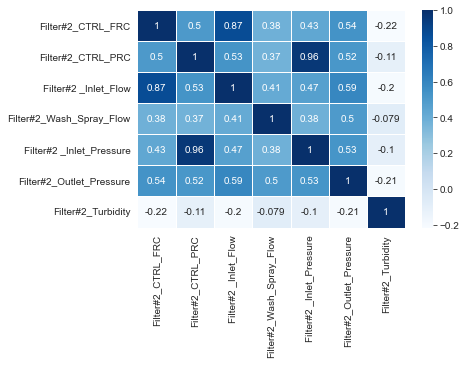

In [30]:
cormat2 = filter2_df.corr()
round(cormat2, 2)
sns.heatmap(cormat2,annot=True, cmap="Blues", linewidths=.7)

In [31]:
# TODO - Figure out to represent NaN values with different color for rest of the filters...

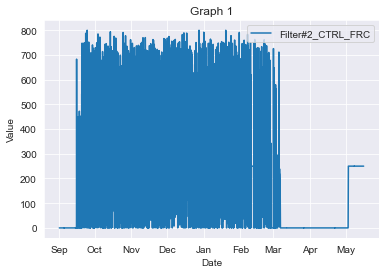

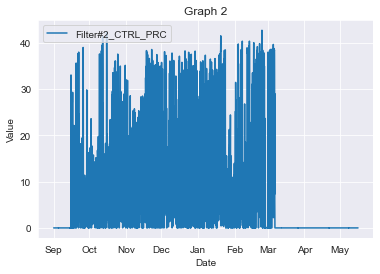

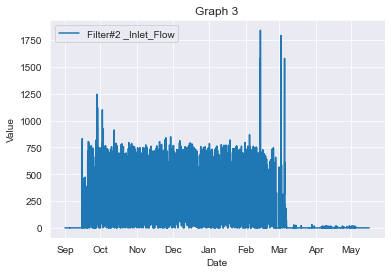

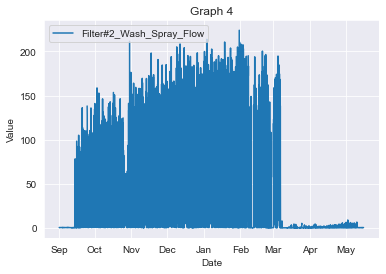

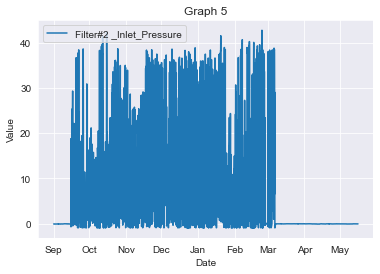

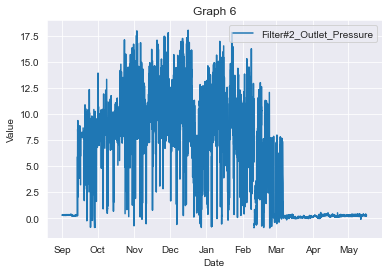

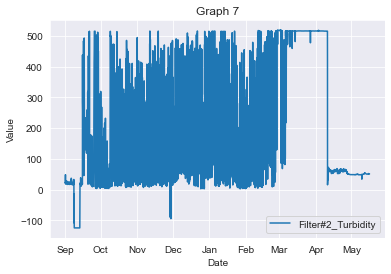

Plots saved to Filter#2.pdf


In [32]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#2.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[5:6], df_1hour.columns[6:7], df_1hour.columns[7:8], df_1hour.columns[8:9], df_1hour.columns[9:10], df_1hour.columns[10:11], df_1hour.columns[11:12]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#3

In [22]:
filter3_df = df_1hour.iloc[:,12:17]
filter3_df

,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity
DateTime,,,,,
2022-09-01 00:00:00,0.610734,0.0,0.610734,-0.214560,116.668886
2022-09-01 01:00:00,0.608946,0.0,0.608946,-0.213769,119.266843
2022-09-01 02:00:00,0.598096,0.0,0.598096,-0.209536,120.994133
2022-09-01 03:00:00,0.585800,0.0,0.585800,-0.207529,122.452280
2022-09-01 04:00:00,0.579362,0.0,0.579362,-0.207246,121.922754
...,...,...,...,...,...
2023-05-16 03:00:00,0.632700,0.0,0.632700,-0.180101,62.547070
2023-05-16 04:00:00,0.631865,0.0,0.631865,-0.180421,60.914955
2023-05-16 05:00:00,0.673036,0.0,0.673036,-0.177850,74.675651


In [23]:
filter3_df.corr(method = 'pearson', min_periods=1)

,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity
FILTER#3_CTRL_FRC,1.000000,0.507720,0.931558,0.440589,-0.421036
FILTER#3_CTRL_PRC,0.507720,1.000000,0.496438,0.965258,-0.292281
Filter#3_Inlet Flow,0.931558,0.496438,1.000000,0.438255,-0.450831
Filter#3_Inlet_Pressure,0.440589,0.965258,0.438255,1.000000,-0.299478
Filter#3_Turbidity,-0.421036,-0.292281,-0.450831,-0.299478,1.000000


<AxesSubplot:>

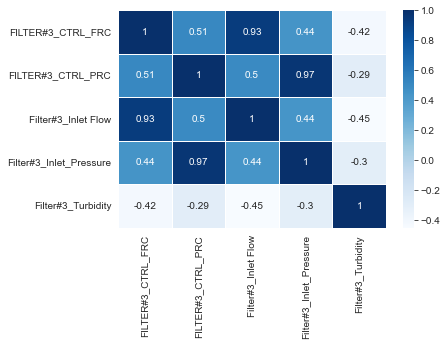

In [24]:
cormat3 = filter3_df.corr()
round(cormat3, 2)
sns.heatmap(cormat3, annot=True, cmap="Blues", linewidths=1)

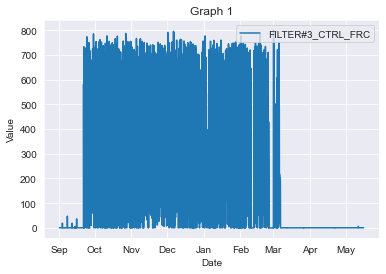

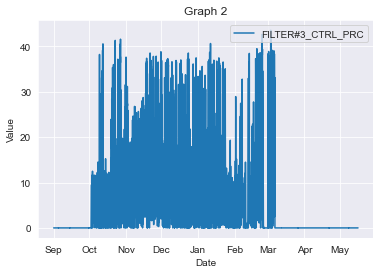

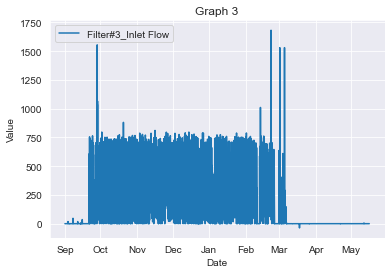

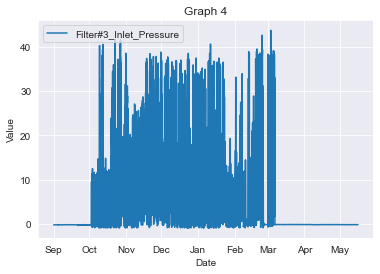

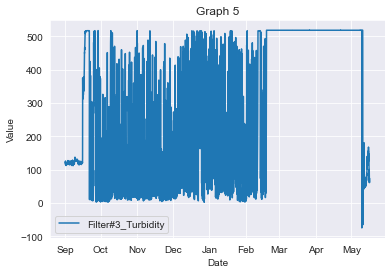

Plots saved to Filter#3.pdf


In [35]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#3.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[12:13], df_1hour.columns[13:14], df_1hour.columns[14:15], df_1hour.columns[15:16], df_1hour.columns[16:17]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)
        # Highlight NaN values with a different color
        line.set_markerfacecolor('red')  # Change this color as desired

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#4

In [26]:
filter4_df = df_1hour.iloc[:,17:21]
filter4_df

,FILTER#4_CTRL_FRC,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity
DateTime,,,,
2022-09-01 00:00:00,0.0,0.634346,0.030467,111.250648
2022-09-01 01:00:00,0.0,0.662452,0.035625,105.327000
2022-09-01 02:00:00,0.0,0.651408,0.039437,109.470900
2022-09-01 03:00:00,0.0,0.638892,0.043757,113.376240
2022-09-01 04:00:00,0.0,0.632148,0.044146,111.317857
...,...,...,...,...
2023-05-16 03:00:00,0.0,0.769896,0.074313,120.618167
2023-05-16 04:00:00,0.0,0.726692,0.073714,120.519815
2023-05-16 05:00:00,0.0,0.717729,0.074827,119.987200


In [27]:
filter4_df.corr(method = 'pearson', min_periods=1)

,FILTER#4_CTRL_FRC,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity
FILTER#4_CTRL_FRC,1.000000,0.900943,0.414103,0.134611
Filter#4 _Inlet_Flow,0.900943,1.000000,0.403525,0.076230
Filter#4_Inlet_Pressure,0.414103,0.403525,1.000000,0.240747
Filter#4 _Turbidity,0.134611,0.076230,0.240747,1.000000


<AxesSubplot:>

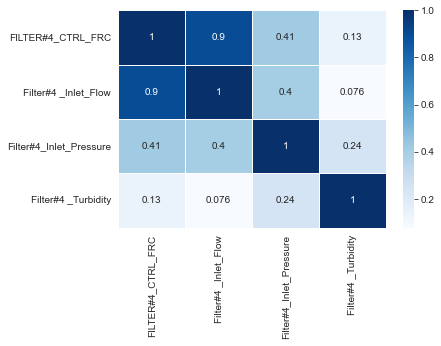

In [28]:
cormat4 = filter4_df.corr()
round(cormat4, 2)
sns.heatmap(cormat4, annot=True, cmap="Blues", linewidths=1)

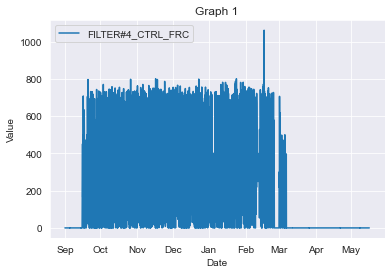

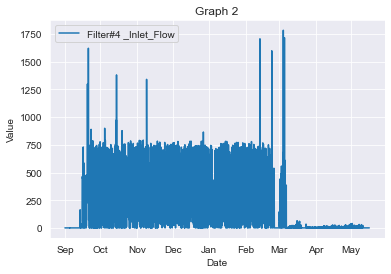

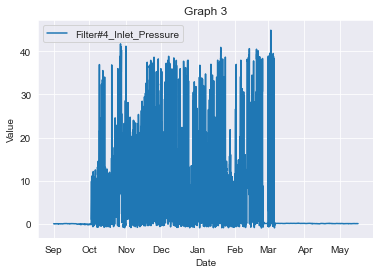

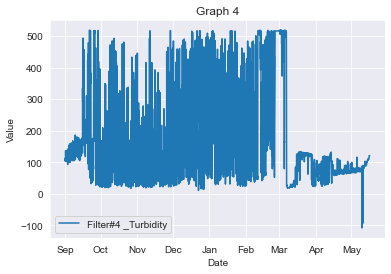

Plots saved to Filter#4.pdf


In [36]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#4.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[17:18], df_1hour.columns[18:19], df_1hour.columns[19:20], df_1hour.columns[20:21]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#5

In [30]:
filter5_df = df_1hour.iloc[:,21:26]
filter5_df

,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity
DateTime,,,,,
2022-09-01 00:00:00,0.0,0.100383,0.378356,0.100383,0.120577
2022-09-01 01:00:00,0.0,0.104690,0.457522,0.104690,0.100791
2022-09-01 02:00:00,0.0,0.107452,0.453128,0.107452,0.096500
2022-09-01 03:00:00,0.0,0.108446,0.432634,0.108446,0.096500
2022-09-01 04:00:00,0.0,0.105680,0.424523,0.105680,0.101785
...,...,...,...,...,...
2023-05-16 03:00:00,0.0,0.127598,0.468072,0.127598,515.895900
2023-05-16 04:00:00,0.0,0.127875,0.451564,0.127875,515.893161
2023-05-16 05:00:00,0.0,0.130596,0.429684,0.130596,515.893650


In [31]:
filter5_df.corr(method = 'pearson', min_periods=1)

,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity
FILTER#5_CTRL_FRC,1.000000,0.513762,0.902644,0.474364,-0.375525
FILTER#5_CTRL_PRC,0.513762,1.000000,0.482836,0.981054,-0.246336
Filter#5_Inlet_Flow,0.902644,0.482836,1.000000,0.446582,-0.410962
Filter#5_Inlet_Pressure,0.474364,0.981054,0.446582,1.000000,-0.243006
Filter#5 _Turbidity,-0.375525,-0.246336,-0.410962,-0.243006,1.000000


<AxesSubplot:>

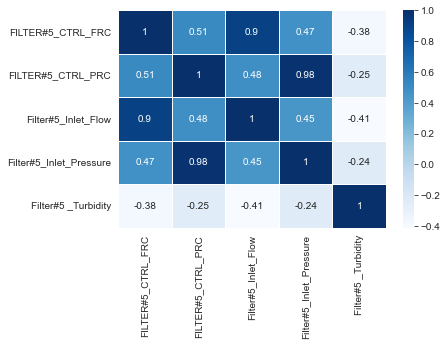

In [32]:
cormat5 = filter5_df.corr()
round(cormat5, 2)
sns.heatmap(cormat5, annot=True, cmap="Blues", linewidths=1)

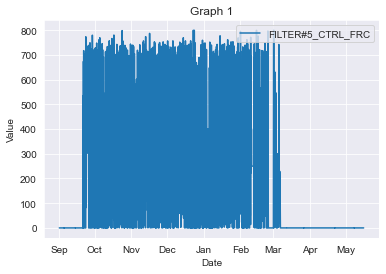

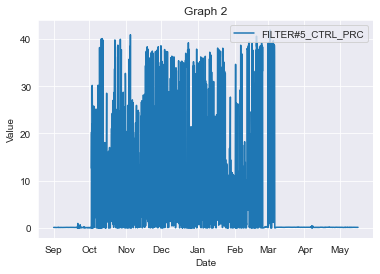

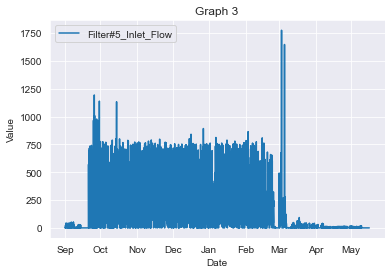

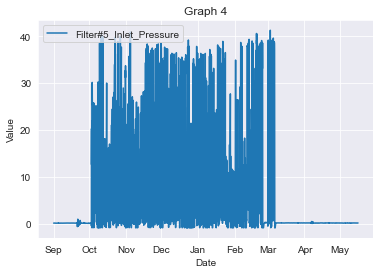

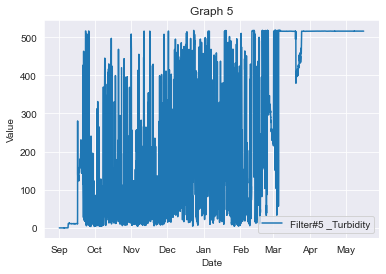

Plots saved to Filter#5.pdf


In [37]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#5.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[21:22], df_1hour.columns[22:23], df_1hour.columns[23:24], df_1hour.columns[24:25], df_1hour.columns[25:26]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#6

In [34]:
filter6_df = df_1hour.iloc[:,26:30]
filter6_df

,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity
DateTime,,,,
2022-09-01 00:00:00,0.0,0.462866,-0.077595,0.249652
2022-09-01 01:00:00,0.0,0.445853,-0.087181,0.234845
2022-09-01 02:00:00,0.0,0.469541,-0.094402,0.224528
2022-09-01 03:00:00,0.0,0.496386,-0.100942,0.214898
2022-09-01 04:00:00,0.0,0.519563,-0.097269,0.213692
...,...,...,...,...
2023-05-16 03:00:00,0.0,0.530282,-0.103138,78.914647
2023-05-16 04:00:00,0.0,0.530966,-0.099189,79.262578
2023-05-16 05:00:00,0.0,0.562394,-0.101825,78.856260


In [35]:
filter6_df.corr(method = 'pearson', min_periods=1)

,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity
FILTER#6_CTRL_FRC,1.000000,0.898197,0.477614,0.068755
Filter#6_Inlet_Flow,0.898197,1.000000,0.478720,0.026557
Filter#6 _Inlet_Pressure,0.477614,0.478720,1.000000,0.113946
Filter#6_Turbidity,0.068755,0.026557,0.113946,1.000000


<AxesSubplot:>

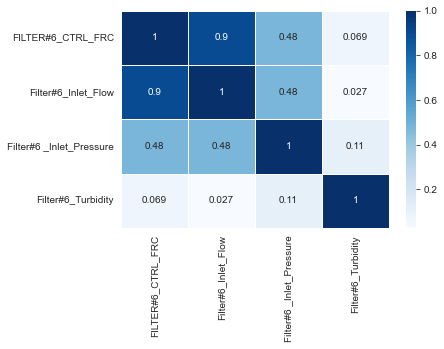

In [36]:
cormat6 = filter6_df.corr()
round(cormat6, 2)
sns.heatmap(cormat6, annot=True, cmap="Blues", linewidths=1)

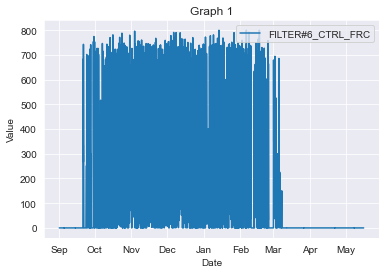

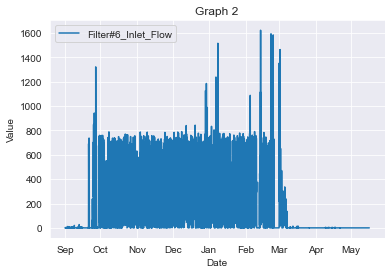

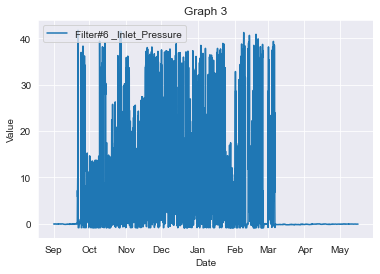

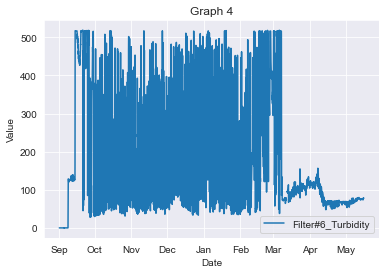

Plots saved to Filter#6.pdf


In [38]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#6.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[26:27], df_1hour.columns[27:28], df_1hour.columns[28:29], df_1hour.columns[29:30]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")